<a href="https://colab.research.google.com/github/sagardampba2022w/NLP_with_hugging_face/blob/main/nlp_hf_04_multilingual_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading NER Sample Dataset

In [ ]:
#!pip install datasets



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.3 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.1 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.3 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00






















  Attempting uninstall: requests

    Found existing installation: requests 2.31.0

    Uninstalling requests-2.31.0:

      Successfully uninstalled requests-2.31.0

  Attempting uninstall: pyarrow

    Found existing installation: pyarrow 14.0.2

    Uninstalling pyarrow-14.0.2:

      Successfully uninstalled pyarrow-14.0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
from datasets import get_dataset_config_names
xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

XTREME has 183 configurations


In [ ]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [ ]:
from datasets import load_dataset
load_dataset("xtreme", name="PAN-X.de")

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

To make a realistic Swiss corpus, we’ll sample the German (de), French (fr), Italian
(it), and English (en) corpora from PAN-X according to their spoken proportions.

In [ ]:
from collections import defaultdict
from datasets import DatasetDict
langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]

# Return a DatasetDict if a key doesn't exist
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
# Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
# Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
        ds[split]
        .shuffle(seed=0)
        .select(range(int(frac * ds[split].num_rows))))

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs},
index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [ ]:
# Let’s inspect one of the examples in the German corpus:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [ ]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


We’ll use the
map() method to return a dict with the key corresponding to the new column name
and the value as a list of class names:

In [ ]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}


panx_de = panx_ch["de"].map(create_tag_names)

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],
['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


As a quick check that we don’t have any unusual imbalance in the tags, let’s calculate
the frequencies of each entity across each split:

In [ ]:
from collections import Counter
split2freqs = defaultdict(Counter)

for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
              tag_type = tag.split("-")[1]
              split2freqs[split][tag_type] += 1
              pd.DataFrame.from_dict(split2freqs, orient="index")

# Multilingual Transformers

Multilingual transformer
models are usually evaluated in three different ways:
1. en :
Fine-tune on the English training data and then evaluate on each language’s test
set.
2. each :
Fine-tune and evaluate on monolingual test data to measure per-language
performance.
3. all :
Fine-tune on all the training data to evaluate on all on each language’s test set.

# A Closer Look at Tokenization

Instead of using a WordPiece tokenizer, XLM-R uses a tokenizer called SentencePiece
that is trained on the raw text of all one hundred languages.

In [ ]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

print(f"BERT: {bert_tokens}")
print(f"XLM-R: {xlmr_tokens}")

BERT: ['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'York', '!', '[SEP]']
XLM-R: ['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁York', '!', '</s>']


# The Tokenizer Pipeline

1. Normalization
This step corresponds to the set of operations you apply to a raw string to make it“cleaner.” Common operations include stripping whitespace and removing accen‐
ted characters.

2. Pretokenization
This step splits a text into smaller objects that give an upper bound to what your
tokens will be at the end of training. A good way to think of this is that the preto‐
kenizer will split your text into “words,” and your final tokens will be parts of those words.

3. Tokenizer model
Once the input texts are normalized and pretokenized, the tokenizer applies a
subword splitting model on the words. This is the part of the pipeline that needs
to be trained on your corpus (or that has been trained if you are using a pre‐
trained tokenizer). The role of the model is to split the words into subwords to
reduce the size of the vocabulary and try to reduce the number of out-of-
vocabulary tokens. Several subword tokenization algorithms exist, including BPE, Unigram, and WordPiece.

4. Postprocessing
This is the last step of the tokenization pipeline, in which some additional trans‐
formations can be applied on the list of tokens—for instance, adding special
tokens at the beginning or end of the input sequence of token indices.

# The SentencePiece Tokenizer

The SentencePiece tokenizer is based on a type of subword segmentation called
Unigram and encodes each input text as a sequence of Unicode characters.

This last feature is especially useful for multilingual corpora since it allows SentencePiece to be
agnostic about accents, punctuation, and the fact that many languages, like Japanese,
do not have whitespace characters.

Another special feature of SentencePiece is that
whitespace is assigned the Unicode symbol U+2581, or the ▁ character, also called
the lower one quarter block character. This enables SentencePiece to detokenize a sequence without ambiguities and without relying on language-specific pretokeniz‐
ers.

SentencePiece preserves the whitespace in the tokenized text so we can con‐
vert back to the raw text without ambiguity:

In [ ]:
"".join(xlmr_tokens).replace(u"\u2581", " ")

'<s> Jack Sparrow loves New York!</s>'

Now that we understand how SentencePiece works, let’s see how we can encode our
simple example in a form suitable for NER. The

# Transformers for Named Entity Recognition

# The Anatomy of the Transformers Model Class

Transformers is designed to enable you to easily extend existing mod‐
els for your specific use case. You can load the weights from pretrained models, and
you have access to task-specific helper functions. This lets you build custom models
for specific objectives with very little overhead. In this section, we’ll see how we can
implement our own custom model.

## Bodies and Heads

We have already seen that when
we switch from the pretraining task to the downstream task, we need to replace the
last layer of the model with one that is suitable for the task. This last layer is called the
model head; it’s the part that is task-specific. The rest of the model is called the body;
it includes the token embeddings and transformer layers that are task-agnostic.

## Creating a Custom Model for Token Classification

Let’s go through the exercise of building a custom token classification head for XLM-
R.

To get started, we need a data structure that will represent our XLM-R NER tagger. As
a first guess, we’ll need a configuration object to initialize the model and a forward()
function to generate the outputs. Let’s go ahead and build our XLM-R class for token
classification:

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel


class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights
        self.init_weights()


    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits,
        hidden_states=outputs.hidden_states,
        attentions=outputs.attentions)

### Loading a Custom Model

Now we are ready to load our token classification model. We’ll need to provide some
additional information beyond the model name, including the tags that we will use to
label each entity and the mapping of each tag to an ID and vice versa. All of this
information can be derived from our tags variable, which as a ClassLabel object has
a names attribute that we can use to derive the mapping:

In [ ]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [ ]:
from transformers import AutoConfig
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
num_labels=tags.num_classes,
id2label=index2tag, label2id=tag2index)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Now, we can load the model weights as usual with the from_pretrained() function
with the additional config argument. Note that we did not implement loading pre‐
trained weights in our custom model class;

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification
.from_pretrained(xlmr_model_name, config=xlmr_config)
.to(device))

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


As a quick check that we have initialized the tokenizer and model correctly, let’s test
the predictions on our small sequence of known entities:

In [ ]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


Finally, we need to pass the inputs to the model and extract the predictions by taking
the argmax to get the most likely class per token:

In [ ]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")


Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


In [ ]:
# By enumerating over the sequence, we can quickly see what the pretrained model predicts:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,I-ORG,B-PER,I-ORG,B-PER,B-PER,I-ORG,B-PER,B-PER,I-ORG,I-ORG


Unsurprisingly, our token classification layer with random weights leaves a lot to be
desired; let’s fine-tune on some labeled data to make it better! Before doing so, let’s
wrap the preceding steps into a helper function for later use:

In [ ]:
def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

Before we can train the model, we also need to tokenize the inputs and prepare the
labels. We’ll do that next.

# Tokenizing Texts for NER

Now that we’ve established that the tokenizer and model can encode a single example,
our next step is to tokenize the whole dataset so that we can pass it to the XLM-R
model for fine-tuning.

In [ ]:
words, labels = de_example["tokens"], de_example["ner_tags"]


In [ ]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In this example we can see that the tokenizer has split “Einwohnern” into two sub‐
words, “▁Einwohner” and “n”. Since we’re following the convention that only
“▁Einwohner” should be associated with the B-LOC label, we need a way to mask the
subword representations after the first subword. Fortunately, tokenized_input is a
class that contains a word_ids() function that can help us achieve this:

In [ ]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


Here we can see that word_ids has mapped each subword to the corresponding index
in the words sequence, so the first subword, “▁2.000”, is assigned the index 0, while
“▁Einwohner” and “n” are assigned the index 1

In [ ]:
#hide_output
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


And that’s it! We can clearly see how the label IDs align with the tokens, so let’s scale
this out to the whole dataset by defining a single function that wraps all the logic:

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])

By applying this function to a DatasetDict object, we get an encoded Dataset object
per split. Let’s use this to encode our German corpus:

In [ ]:

panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

# Performance Measures

Evaluating a NER model is similar to evaluating a text classification model, and it is
common to report results for precision, recall, and F1

-score. The only subtlety is that
all words of an entity need to be predicted correctly in order for a prediction to be
counted as correct.

In [ ]:
pip install seqeval

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 809.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=9be167f168fbd0a6d00cdef5262957cf332466f52d2eb0977826167ad00aba18
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from seqeval.metrics import classification_report
y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



we need a function that can take the outputs of the model
and convert them into the lists that seqeval expects. The following does the trick by
ensuring we ignore the label IDs associated with subsequent subwords:

In [ ]:

import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

Equipped with a performance metric, we can move on to actually training the model.

# Fine-Tuning XLM-RoBERTa

We now have all the ingredients to fine-tune our model! Our first strategy will be to

fine-tune our base model on the German subset of PAN-X and then evaluate its zero-
shot cross-lingual performance on French, Italian, and English.

In [ ]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name,
    log_level="error",
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    eval_strategy="epoch",
    save_steps=1e6,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:

from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

The final step is to define a data collator so we can pad each input sequence to the
largest sequence length in a batch. Transformers provides a dedicated data collator
for token classification that will pad the labels along with the inputs:

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

2024-07-11 08:33:03.684524: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 08:33:03.684650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 08:33:03.807991: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:

def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))


In [ ]:

#hide
%env TOKENIZERS_PARALLELISM=false


In [ ]:
# hide_output
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args,
                  data_collator=data_collator, compute_metrics=compute_metrics,
                  train_dataset=panx_de_encoded["train"],
                  eval_dataset=panx_de_encoded["validation"],
                  tokenizer=xlmr_tokenizer)

In [ ]:

#hide_input
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.156479,0.821036
2,0.214400,0.136199,0.849220
3,0.214400,0.134543,0.858601


events.out.tfevents.1720686803.2e1daa765a79.34.0:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/sagar213/xlm-roberta-base-finetuned-panx-de/commit/713fcaccd9a6f1efe167939f67ba231f1878bead', commit_message='Training completed!', commit_description='', oid='713fcaccd9a6f1efe167939f67ba231f1878bead', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:

# hide_input
df = pd.DataFrame(trainer.state.log_history)[['epoch','loss' ,'eval_loss', 'eval_f1']]
df = df.rename(columns={"epoch":"Epoch","loss": "Training Loss", "eval_loss": "Validation Loss", "eval_f1":"F1"})
df['Epoch'] = df["Epoch"].apply(lambda x: round(x))
df['Training Loss'] = df["Training Loss"].ffill()
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill()
df.drop_duplicates()


,Epoch,Training Loss,Validation Loss,F1
0,1,NaN,0.156479,0.821036
1,2,0.2144,0.136199,0.849220
3,3,0.2144,0.134543,0.858601


In [ ]:
# hide_output
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


# Error Analysis

There are several failure
modes where it might look like the model is performing well, while in practice it has
some serious flaws. Examples where training can fail include:
1. • We might accidentally mask too many tokens and also mask some of our labels to
get a really promising loss drop.
2. • The compute_metrics() function might have a bug that overestimates the true
performance.
3. • We might include the zero class or O entity in NER as a normal class, which will
heavily skew the accuracy and F1 -score since it is the majority class by a large margin.

For our analysis we will again use one of the most powerful tools at our disposal,
which is to look at the validation examples with the highest loss. We can reuse much
of the function we built to analyze the sequence classification model in Chapter 2, but
we’ll now calculate a loss per token in the sample sequence.
Let’s define a method that we can apply to the validation set:

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Convert dict of lists to list of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # Logit.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()

    return {"loss":loss, "predicted_label": predicted_label}


In [ ]:
# hide_output
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

The tokens and the labels are still encoded with their IDs, so let’s map the tokens and
labels back to strings to make it easier to read the results. For the padding tokens with
label –100 we assign a special label, IGN, so we can filter them later. We also get rid of
all the padding in the loss and predicted_label fields by truncating them to the
length of the inputs:

In [ ]:

# hide_output
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(
    lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(
    lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.024517307, 0.0, 0.034410723, 0.0208258...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


Let’s have a look at the tokens individually by unpacking these lists. The
pandas.Series.explode() function allows us to do exactly that in one line by creat‐
ing a row for each element in the original rows list. Since all the lists in one row have
the same length, we can do this in parallel for all columns. We also drop the padding
tokens we named IGN, since their loss is zero anyway. Finally, we cast the losses, which
are still numpy.Array objects, to standard floats:

In [ ]:

# hide_output
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.02,B-ORG,▁Ham
0,15,1,I-ORG,0.03,I-ORG,▁(
0,16104,1,I-ORG,0.02,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.03,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,0.94,B-ORG,▁Luz
1,10,1,I-ORG,0.70,I-ORG,▁a


With the data in this shape, we can now group it by the input tokens and aggregate
the losses for each token with the count, mean, and sum.

In [ ]:

(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁der,▁von,▁in,▁/,▁(,▁und,▁),▁'',▁A
count,6066,1388,808,989,163,246,1171,246,2898,125
mean,0.03,0.1,0.16,0.12,0.55,0.33,0.07,0.32,0.03,0.49
sum,184.6,134.89,131.27,118.84,89.01,80.34,79.97,77.57,72.53,61.35


In [ ]:

(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,I-LOC,B-ORG,I-ORG,B-LOC,B-PER,I-PER,O
count,1462,2683,3820,3172,2893,4139,43648
mean,0.63,0.59,0.48,0.35,0.27,0.17,0.03
sum,918.99,1594.88,1842.96,1095.62,771.74,710.03,1343.38


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

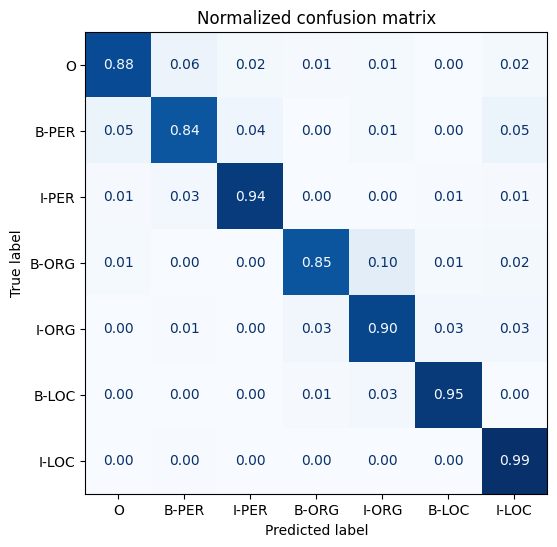

In [ ]:

plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
                      tags.names)

Now that we’ve examined the errors at the token level, let’s move on and look at
sequences with high losses.

In [ ]:
# hide_output
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                               "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,B-ORG,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,2.83,0.00,0.00,0.00,9.82,9.56,8.05,7.71,8.36,0.00,7.97,8.87,0.00,8.92,8.88,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,9.52,0.00,0.00,3.95,8.40,9.00,6.17,0.00,7.31,8.57,6.88,4.87,4.23,0.00,0.00,0.01,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.14,5.45,5.35,0.00,5.34,0.00,5.21,0.00,5.20,4.57,4.16,4.78,5.03,5.00,0.00


It is apparent that something is wrong with the labels of these samples; for example,
the United Nations and the Central African Republic are each labeled as a person! At
the same time, “8. Juli” in the first example is labeled as an organization. It turns out
the annotations for the PAN-X dataset were generated through an automated process.

Another thing we noticed earlier was that parentheses and slashes had a relatively
high loss. Let’s look at a few examples of sequences with an opening parenthesis:

In [ ]:
# hide_output
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,0.02,0.00,0.03,0.02,0.03,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.05,0.00,0.00,0.04,0.03,0.00,0.03,0.00


# Cross-Lingual Transfer

Now that we have fine-tuned XLM-R on German, we can evaluate its ability to trans‐
fer to other languages via the predict() method of the Trainer. Since we plan to
evaluate multiple languages, let’s create a simple function that does this for us:

In [ ]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [ ]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


F1-score of [de] model on [de] dataset: 0.861


let’s see how our model fine-tuned on German fares on French:

In [ ]:

text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [ ]:

def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [ ]:
# hide_output
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


F1-score of [de] model on [fr] dataset: 0.685


In [ ]:
# hide_input
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")


F1-score of [de] model on [fr] dataset: 0.685


Next, let’s evaluate the performance on Italian. Since Italian is also a Romance lan‐
guage, we expect to get a similar result as we found on French:

In [ ]:

# hide_output
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")


Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

F1-score of [de] model on [it] dataset: 0.669


In [ ]:

# hide_input
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

F1-score of [de] model on [it] dataset: 0.669


Indeed, our expectations are borne out by the F1

-scores. Finally, let’s examine the per‐

formance on English, which belongs to the Germanic language family:

In [ ]:

#hide_output
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.592


In [ ]:
#hide_input
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

F1-score of [de] model on [en] dataset: 0.592


Having fine-tuned on Ger‐
man and performed zero-shot transfer to French and English, let’s next examine
when it makes sense to fine-tune directly on the target language.

# When Does Zero-Shot Transfer Make Sense?

The question is, how good are
these results and how do they compare against an XLM-R model fine-tuned on a
monolingual corpus?
In this section we will explore this question for the French corpus by fine-tuning
XLM-R on training sets of increasing size. By tracking the performance this way, we
can determine at which point zero-shot cross-lingual transfer is superior, which in
practice can be useful for guiding decisions about whether to collect more labeled
data.

we’ll keep the same hyperparameters from the fine-tuning run on the
German corpus, except that we’ll tweak the logging_steps argument of Training
Arguments to account for the changing training set sizes. We can wrap this all
together in a simple function that takes a DatasetDict object corresponding to a monolingual corpus, downsamples it by num_samples, and fine-tunes XLM-R on that
sample to return the metrics from the best epoch:

In [ ]:

def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")

    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

As we did with fine-tuning on the German corpus, we also need to encode the French
corpus into input IDs, attention masks, and label IDs:

In [ ]:
# hide_output
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

let’s check that our function works by running it on a small training set of 250
examples:

In [ ]:
# hide_output
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df


Epoch,Training Loss,Validation Loss,F1
1,No log,1.458669,0.000000
2,1.607200,1.281625,0.006971
3,1.607200,1.203253,0.082489


,num_samples,f1_score
0,250,0.082061


In [ ]:
metrics_df

,num_samples,f1_score
0,250,0.082061


margin. Let’s now increase our training set
sizes to 500, 1,000, 2,000, and 4,000 examples to get an idea of how the performance
increases:

In [ ]:
import pandas as pd

# Initialize an empty DataFrame
metrics_df = pd.DataFrame()

# Loop to append results to the DataFrame
for num_samples in [500, 1000, 2000, 4000]:
    result = train_on_subset(panx_fr_encoded, num_samples)
    metrics_df = pd.concat([metrics_df, result], ignore_index=True)


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,1.223452,0.013837
2,1.344100,0.888630,0.434316
3,1.344100,0.760568,0.557615


Epoch,Training Loss,Validation Loss,F1
1,No log,0.770724,0.533783
2,0.971000,0.469455,0.704575
3,0.971000,0.421662,0.731326


Epoch,Training Loss,Validation Loss,F1
1,No log,0.435349,0.694157
2,0.668300,0.362530,0.753084
3,0.668300,0.340541,0.791577


Epoch,Training Loss,Validation Loss


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


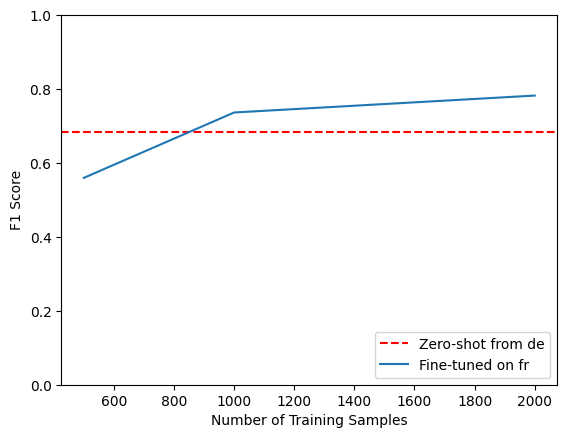

In [ ]:

fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

From the plot we can see that zero-shot transfer remains competitive until about 750
training examples, after which fine-tuning on French reaches a similar level of perfor‐
mance to what we obtained when fine-tuning on German.

There is one final technique we can try to evaluate multilingual learning: fine-tuning
on multiple languages at once! Let’s see how we can do this.

# Fine-Tuning on Multiple Languages at Once

To see what type of gains we
can get, let’s first use the concatenate_datasets() function from Datasets to con‐
catenate the German and French corpora together:

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [ ]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

we’ll again use the same hyperparameters from the previous sections, so
we can simply update the logging steps, model, and datasets in the trainer:

In [ ]:
# hide_output
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Let’s have a look at how the model performs on the test set of each language:

In [ ]:
#hide_output
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:

#hide_input
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Let’s round out our analysis by comparing the performance of fine-tuning on each
language separately against multilingual learning on all the corpora. Since we have
already fine-tuned on the German corpus, we can fine-tune on the remaining lan‐
guages with our train_on_subset() function, with num_samples equal to the num‐
ber of examples in the training set:

In [ ]:
# hide_output
corpora = [panx_de_encoded]

# Exclude German from iteration
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Fine-tune on monolingual corpus
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
    # Collect F1-scores in common dict
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # Add monolingual corpus to list of corpora to concatenate
    corpora.append(ds_encoded)

As with the
previous German and French analysis, we can use the concatenate_splits() func‐
tion to do this step for us on the list of corpora we generated in the previous step:

In [ ]:
corpora_encoded = concatenate_splits(corpora)

Now that we have our multilingual corpus, we run the familiar steps with the trainer:

In [ ]:

# hide_output
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
    eval_dataset=corpora_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

generate the predictions from the trainer on each language’s test
set. This will give us an insight into how well multilingual learning is really working.

In [ ]:

# hide_output
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [ ]:

scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df

In our experiments we can see that German, French, and Italian achieve
similar performance in the all category, suggesting that these languages are
more similar to each other than to English.


As a general strategy, it is a good idea to focus attention on cross-lingual transfer
within language families, especially when dealing with different scripts like
Japanese.